In [61]:
import os 
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem.porter import *

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [2]:
data=pd.read_csv('dataset.csv',encoding = "ISO-8859-1")

In [3]:
data.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [52]:
sentiment_count=data['Sentiment'].value_counts()

In [53]:
sentiment_count=sentiment_count.tolist()

([<matplotlib.patches.Wedge at 0x1f1f1305320>,
 [Text(6.73556e-17,1.1,'Positive'), Text(-2.02067e-16,-1.1,'Negative')])

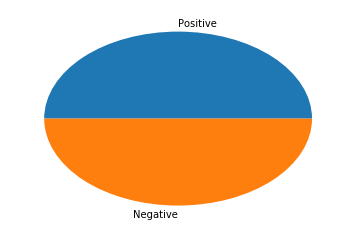

In [57]:
plt.pie(sentiment_count,labels=('Positive','Negative'))

In [4]:
def remove_pattern(input_text,pattern):
  r=re.findall(pattern,input_text)
  for i in r:
    input_text=re.sub(i,'',input_text)
    
  return input_text

In [5]:
data['tidy']=np.vectorize(remove_pattern)(data['SentimentText'],',[\w]*')
data['tidy']=data['tidy'].str.replace('[^a-zA-z]'," ")
data['tidy']=data['tidy'].apply(lambda x:' '.join([w for w in x.split() if len(w)>2]))

In [6]:
data.head()

,SentimentText,Sentiment,tidy
0,"first think another Disney movie, might good, ...",1,first think another Disney movie might good ki...
1,"Put aside Dr. House repeat missed, Desperate H...",0,Put aside House repeat missed Desperate Housew...
2,"big fan Stephen King's work, film made even gr...",1,big fan Stephen King work film made even great...
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing Needless say one movies w...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film acting terrific plot Jeff C...


In [7]:
tokenized_review=data['tidy'].apply(lambda x:x.split())
tokenized_review.head()

0    [first, think, another, Disney, movie, might, ...
1    [Put, aside, House, repeat, missed, Desperate,...
2    [big, fan, Stephen, King, work, film, made, ev...
3    [watched, horrid, thing, Needless, say, one, m...
4    [truly, enjoyed, film, acting, terrific, plot,...
Name: tidy, dtype: object

In [8]:
stemmer=PorterStemmer()

In [9]:
tokenized_review=tokenized_review.apply(lambda x:[stemmer.stem(i) for i in x])

In [10]:
tokenized_review.head()

0    [first, think, anoth, disney, movi, might, goo...
1    [put, asid, hous, repeat, miss, desper, housew...
2    [big, fan, stephen, king, work, film, made, ev...
3    [watch, horrid, thing, needless, say, one, mov...
4    [truli, enjoy, film, act, terrif, plot, jeff, ...
Name: tidy, dtype: object

In [11]:
for i in range(len(tokenized_review)):
    tokenized_review[i]=' '.join(tokenized_review[i])

data['tidy']=tokenized_review

In [12]:
data.head()

,SentimentText,Sentiment,tidy
0,"first think another Disney movie, might good, ...",1,first think anoth disney movi might good kid m...
1,"Put aside Dr. House repeat missed, Desperate H...",0,put asid hous repeat miss desper housew new wa...
2,"big fan Stephen King's work, film made even gr...",1,big fan stephen king work film made even great...
3,watched horrid thing TV. Needless say one movi...,0,watch horrid thing needless say one movi watch...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truli enjoy film act terrif plot jeff comb tal...


In [13]:
all_words=' '.join([word for word in data['tidy']])

In [14]:
all_words_list=all_words.split(' ')

In [15]:
all_word_frame=pd.DataFrame(all_words_list)

In [16]:
X=all_word_frame[0].value_counts()

In [17]:
X

movi               51690
film               48181
one                27728
like               22778
time               16188
good               15353
make               15205
the                14265
charact            14178
get                14139
see                14109
watch              13942
stori              13165
even               12897
would              12434
realli             11731
well               11024
scene              10595
look               10042
show                9875
much                9760
end                 9651
peopl               9389
bad                 9338
great               9164
also                9153
first               9060
love                9013
think               8910
don                 8847
                   ...  
rosenstra              1
sexuali                1
compartment            1
epicsuch               1
kinkl                  1
siberia                1
molerat                1
fuent                  1
dunnno                 1


In [18]:
df2 = pd.DataFrame(np.array(all_words.split(' ')).reshape(-1, 1), columns=['words'])

In [19]:
unique_words = list(df2['words'].str.split(' ', expand=True).stack().unique())

In [20]:
len(unique_words)

51292

In [21]:
word_counts = list(df2['words'].value_counts())

In [22]:
df4 = pd.DataFrame(np.hstack((np.array(unique_words).reshape(-1,1),np.array(word_counts).reshape(-1,1))), columns=['words','word_count'])

In [23]:
df4_new=df4[df4['word_count'].map(len)==1]

In [24]:
df4_words_list = list(df4_new['words'])

In [25]:
unique_words=list(unique_words)

In [26]:
for word in df4_words_list:
    unique_words.remove(word)

In [27]:
len(unique_words)

14132

In [28]:
type(unique_words)

list

In [29]:
df4_new.head()

,words,word_count
14132,contemptu,9
14133,bicycl,9
14134,victrola,9
14135,vaccin,9
14136,barcelona,9


In [30]:
new_data=data

In [31]:
new_data.head()

,SentimentText,Sentiment,tidy
0,"first think another Disney movie, might good, ...",1,first think anoth disney movi might good kid m...
1,"Put aside Dr. House repeat missed, Desperate H...",0,put asid hous repeat miss desper housew new wa...
2,"big fan Stephen King's work, film made even gr...",1,big fan stephen king work film made even great...
3,watched horrid thing TV. Needless say one movi...,0,watch horrid thing needless say one movi watch...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truli enjoy film act terrif plot jeff comb tal...


In [32]:
tokenized_tidy=new_data['tidy'].apply(lambda x:x.split())
tokenized_tidy.head()

0    [first, think, anoth, disney, movi, might, goo...
1    [put, asid, hous, repeat, miss, desper, housew...
2    [big, fan, stephen, king, work, film, made, ev...
3    [watch, horrid, thing, needless, say, one, mov...
4    [truli, enjoy, film, act, terrif, plot, jeff, ...
Name: tidy, dtype: object

In [33]:
for i in tokenized_tidy:
    for j in i:
        if j not in unique_words:
            i.remove(j)

In [34]:
len(tokenized_tidy)

25000

In [35]:
for i in range(len(tokenized_tidy)):
    tokenized_tidy[i]=' '.join(tokenized_tidy[i])

new_data['new_tidy']=tokenized_tidy

In [36]:
new_data.head()

,SentimentText,Sentiment,tidy,new_tidy
0,"first think another Disney movie, might good, ...",1,first think anoth disney movi might good kid m...,first think anoth disney movi might good kid m...
1,"Put aside Dr. House repeat missed, Desperate H...",0,put asid hous repeat miss desper housew new wa...,put asid hous repeat miss desper housew new wa...
2,"big fan Stephen King's work, film made even gr...",1,big fan stephen king work film made even great...,big fan stephen king work film made even great...
3,watched horrid thing TV. Needless say one movi...,0,watch horrid thing needless say one movi watch...,watch horrid thing needless say one movi watch...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truli enjoy film act terrif plot jeff comb tal...,truli enjoy film act terrif plot jeff comb tal...


In [37]:
rev_vectorizer=CountVectorizer(stop_words='english',max_features=20000,ngram_range=(1,3))
rev= rev_vectorizer.fit_transform(new_data['new_tidy'])

In [38]:
rev_vectorizer_1=TfidfVectorizer(stop_words='english',max_features=20000,ngram_range=(1,3))
rev_1=rev_vectorizer_1.fit_transform(new_data['new_tidy'])

In [39]:
train_rev=rev
train_rev_1=rev_1
xtrain_rev,xvalid_rev,ytrain,yvalid=train_test_split(train_rev,new_data['Sentiment'],test_size=0.2)

In [40]:
lreg=LogisticRegression()
lreg.fit(xtrain_rev,ytrain)

prediction = lreg.predict_proba(xvalid_rev) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

In [41]:
f1_score(yvalid, prediction_int)

0.8753993610223643

In [42]:
lreg.fit(xtrain_rev,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
y_pred=lreg.predict(xvalid_rev)

In [44]:
print(accuracy_score(yvalid,y_pred))

0.8752


In [59]:
cm=confusion_matrix(yvalid,y_pred)

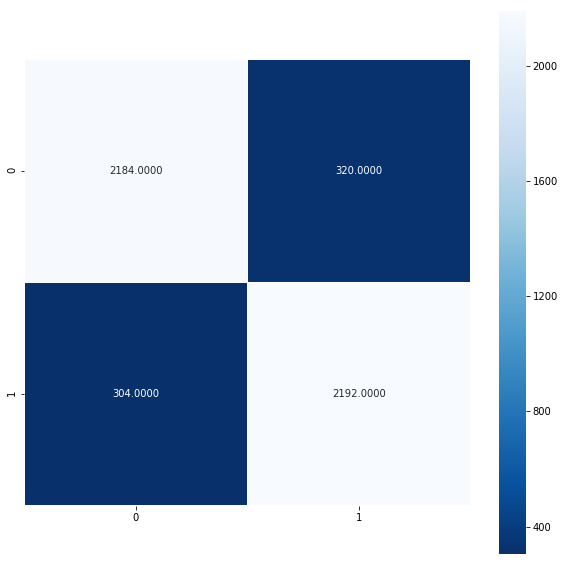

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt=".4f",linewidth=0.5,square=True,cmap='Blues_r')